Code to import and clean (if necessary) data for the selected California homes in pecan_street_metadata_analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot formatting defaults
plt.rc('ytick', direction='out')
plt.rc('grid', color='w', linestyle='solid')
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', direction='out')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [2]:
ca_ids = pd.read_csv('ca_ids.csv', header=None)

In [3]:
ca_ids = ca_ids[0].to_list()

In [4]:
ca_ids

[11896, 2354, 4509, 4315, 11, 4622, 9477, 8277, 11478, 8908, 9221, 864, 3637]

In [27]:
df = pd.read_csv('15minute_data_california.csv')
df = df[['dataid', 'local_15min', 'battery1', 'grid', 'solar', 'solar2']]

                   

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368


In [6]:
df.head()

,dataid,local_15min,battery1,grid,solar,solar2
0,3687,2014-01-01 00:00:00-06,NaN,1.717,NaN,NaN
1,3687,2014-01-01 00:15:00-06,NaN,1.905,NaN,NaN
2,3687,2014-01-01 00:30:00-06,NaN,1.923,NaN,NaN
3,3687,2014-01-01 00:45:00-06,NaN,1.535,NaN,NaN
4,3687,2014-01-01 01:00:00-06,NaN,1.010,NaN,NaN


In [7]:
df.dataid.unique()

array([3687, 6377, 7062, 8574, 9213,  203, 1450, 1524, 2606, 3864, 7114,
       1731, 4495, 8342, 3938, 5938, 8061, 9775, 4934, 8733, 9612, 9836,
       6547])

In [49]:
# df2 = df.loc[df.dataid.astype(int).isin(ca_ids)]
# df.dataid.astype(int).isin(ca_ids)
# TODO: Why are none of the IDs I want in the dataset???

In [9]:
df2 = df.loc[df.solar.notnull()]
df3 = df.loc[df.grid.notnull()]


In [24]:
df.columns

Index(['dataid', 'local_15min', 'battery1', 'grid', 'solar', 'solar2'], dtype='object')

In [25]:
df.head()

,dataid,local_15min,battery1,grid,solar,solar2
0,3687,2014-01-01 00:00:00-06,NaN,1.717,NaN,NaN
1,3687,2014-01-01 00:15:00-06,NaN,1.905,NaN,NaN
2,3687,2014-01-01 00:30:00-06,NaN,1.923,NaN,NaN
3,3687,2014-01-01 00:45:00-06,NaN,1.535,NaN,NaN
4,3687,2014-01-01 01:00:00-06,NaN,1.010,NaN,NaN


In [50]:
df2.head()

,dataid,local_15min,battery1,grid,solar,solar2
392516,1731,2018-03-16 05:00:00-05,NaN,0.226,0.0,NaN
392517,1731,2018-03-16 05:15:00-05,NaN,0.257,0.0,NaN
392518,1731,2018-03-16 05:30:00-05,NaN,0.163,0.0,NaN
392519,1731,2018-03-16 05:45:00-05,NaN,0.174,0.0,NaN
392520,1731,2018-03-16 06:00:00-05,NaN,0.182,0.0,NaN


In [10]:
df2.dataid.unique()

array([1731, 4495, 8342, 9836])

In [11]:
df3.dataid.unique()

array([3687, 6377, 7062, 8574, 9213,  203, 1450, 1524, 2606, 3864, 7114,
       1731, 4495, 8342, 3938, 5938, 8061, 9775, 4934, 8733, 9612, 9836,
       6547])

In [50]:
test = df3.loc[df3.dataid == 3687]
print(test.head())
print(test.tail())

   dataid             local_15min  battery1   grid  solar  solar2
0    3687  2014-01-01 00:00:00-06       NaN  1.717    NaN     NaN
1    3687  2014-01-01 00:15:00-06       NaN  1.905    NaN     NaN
2    3687  2014-01-01 00:30:00-06       NaN  1.923    NaN     NaN
3    3687  2014-01-01 00:45:00-06       NaN  1.535    NaN     NaN
4    3687  2014-01-01 01:00:00-06       NaN  1.010    NaN     NaN
       dataid             local_15min  battery1   grid  solar  solar2
35031    3687  2014-12-31 22:45:00-06       NaN  1.697    NaN     NaN
35032    3687  2014-12-31 23:00:00-06       NaN  2.072    NaN     NaN
35033    3687  2014-12-31 23:15:00-06       NaN  2.198    NaN     NaN
35034    3687  2014-12-31 23:30:00-06       NaN  2.222    NaN     NaN
35035    3687  2014-12-31 23:45:00-06       NaN  2.210    NaN     NaN


In [51]:
test = df2.loc[df2.dataid == 9836]
print(test.head())
print(test.tail())

        dataid             local_15min  battery1   grid  solar  solar2
736124    9836  2014-07-08 00:00:00-05       NaN  0.758  0.001     NaN
736125    9836  2014-07-08 00:15:00-05       NaN  0.702  0.001     NaN
736126    9836  2014-07-08 00:30:00-05       NaN  0.637  0.002     NaN
736127    9836  2014-07-08 00:45:00-05       NaN  0.926  0.001     NaN
736128    9836  2014-07-08 01:00:00-05       NaN  0.677  0.002     NaN
        dataid             local_15min  battery1   grid  solar  solar2
770483    9836  2015-06-30 22:45:00-05       NaN  0.267  0.002     NaN
770484    9836  2015-06-30 23:00:00-05       NaN  0.605  0.000     NaN
770485    9836  2015-06-30 23:15:00-05       NaN  0.809  0.000     NaN
770486    9836  2015-06-30 23:30:00-05       NaN  0.407  0.001     NaN
770487    9836  2015-06-30 23:45:00-05       NaN  0.347  0.001     NaN


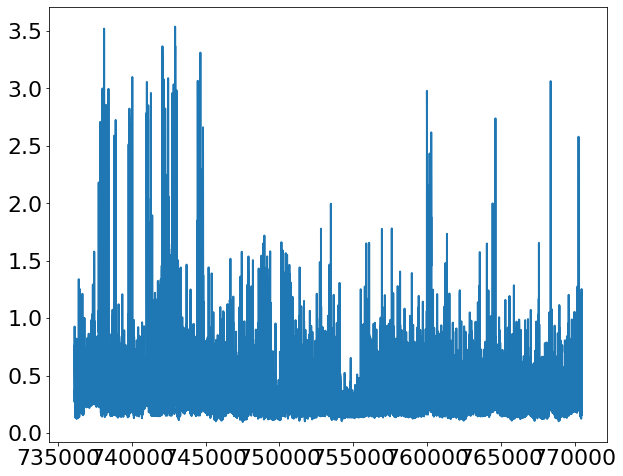

In [59]:
plt.plot(test.grid + test.solar)